In [8]:
from modules.client import OffVarianceClient
import modules.utils as utils
from pandas import DataFrame
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [2]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win2'] >= 1.8) & (games_df['odds_open_win2'] <= 2.7) &
(games_df['odds_open_tb25'] >= 2.0) & (games_df['odds_open_tb25'] <= 2.5)
]

Count: 4735
Open profit: 11.899999999999977
Close profit: -67.53000000000002
Open ROI: 0.0025131995776135115
Close ROI: -0.014261879619852168
UDI: 0.013975155226209979
AxesSubplot(0.125,0.125;0.775x0.755)


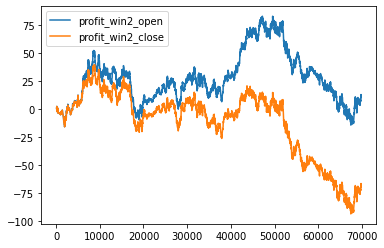

In [3]:
utils.print_away_win_result(segmented_df)

In [4]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
expected_difference,0.098742
expected_difference_loc,0.081746
simple_expected_difference,0.059052
simple_expected_difference_loc,0.041499
expected_total_loc,-0.019175
simple_expected_total_value,0.015125
simple_expected_total_value_loc,-0.005502
expected_total,-0.001074


In [5]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win2')

,low,high,diff
expected_difference_loc,-0.285267,-0.497635,0.212368
expected_difference,-0.253294,-0.460581,0.207287
simple_expected_difference,-0.262528,-0.377439,0.114910
simple_expected_difference_loc,-0.056299,-0.168474,0.112175
expected_total_loc,2.192439,2.269360,0.076920
expected_total,2.183512,2.259127,0.075615
simple_expected_total_value,4.562286,4.632183,0.069897
simple_expected_total_value_loc,4.509033,4.555991,0.046958


In [15]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_difference_loc'] <= -0.46) & (segmented_df['expected_difference'] <= -0.49)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_difference_loc',
    'expected_difference',
], 'udi_win1')

,low,high,diff
expected_difference,-0.799286,-0.778651,0.020635
expected_difference_loc,-0.969358,-0.975745,0.006387


Count: 304
Open profit: 34.949999999999996
Close profit: 17.1
Open ROI: 0.11496710526315788
Close ROI: 0.05625
UDI: 0.05856799848903853
AxesSubplot(0.125,0.125;0.775x0.755)


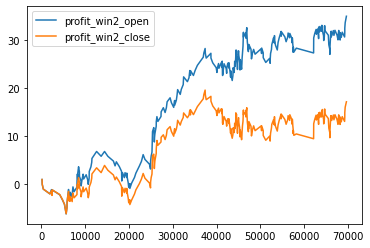

In [16]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_difference'] <= -0.77) & (segmented_df['expected_difference_loc'] <= -0.97)
]
utils.print_away_win_result(filtered_result_df)